In [41]:
### NOTE: A lot of code was taken from Tut 0! ###

import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import csv
class Baseline_Data:

    def __init__(self, Filename):
        """load data set"""
        file_dir = "/content/drive/MyDrive/"
        with open(file_dir + Filename,'r') as csvfile:
          data_reader = csv.reader(csvfile)

          data_orig = []
          for row in data_reader:
            data_orig.append(row)

        # loop through field names and populate a dictionary with indices
        fields = {}
        for i in range(len(data_orig[0])):
            fields[data_orig[0][i]] = i

        # exclude the first row when preparing the numpy data structure
        self.data = np.array(data_orig[1:])
        self.fields = fields

    def clean(self, col_header, values = []):
        """Converts column data into numerical values
        (missing data is convereted into nan)"""
        # select the column
        column = self.data[:,self.fields[col_header]]
        # find the ones that are empty and make them nan
        column[column == ''] = np.nan
        # encode the the strings as numbers
        for i in range(len(values)):
            column[column == values[i]] = i
        # overwrite
        self.data[:,self.fields[col_header]] = column

    def keep_columns(self, L):
        """ Select Features """
        feature_data = self.data[:,L]
        feature_data = feature_data.astype(float)
        return feature_data

    def clean_data(self):
        """Converts all data into numerical values
        (missing data is converted into nan)"""
        self.clean('image_id')
        self.clean('n_citi')
        self.clean('bed')
        self.clean('bath')
        self.clean('sqft')
        self.clean('price')

In [102]:
baselineData = Baseline_Data('testHouses.csv')
print(baselineData.data[0,:]) # first row of data

baselineData.clean_data()
print(baselineData.data[0,:])

feature_data = baselineData.keep_columns([1, 2, 3, 4, 5]) #get rid of image id
print(feature_data[0,:])

['1' '48' '3' '2' '713' '228500']
['1' '48' '3' '2' '713' '228500']
[4.800e+01 3.000e+00 2.000e+00 7.130e+02 2.285e+05]


In [103]:
# replace all nan values with -1 to prevent an error
feature_data[np.isnan(feature_data)==1] = -1

# segment data into training and testing datasets (features)
# We are looking for a 70/30 % split, 70% of 3000 is 2100
training_data = feature_data[0:3000,0:4]
testing_data = feature_data[3000:4000,0:4]

# segment data into training and testing labels (targets)
training_labels = feature_data[0:3000,4]
testing_labels = feature_data[3000:4000,4]

print(len(training_data))
print(len(testing_data))
#print(training_data)
#print(training_labels)

3000
1000


In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(training_data, training_labels)

c = lr.intercept_

print(c)

339338.38225594413


In [105]:
m = lr.coef_
print(m)

[   50.6261015  12739.93314099 -2424.89411491    95.02403007]


<function matplotlib.pyplot.show(close=None, block=None)>

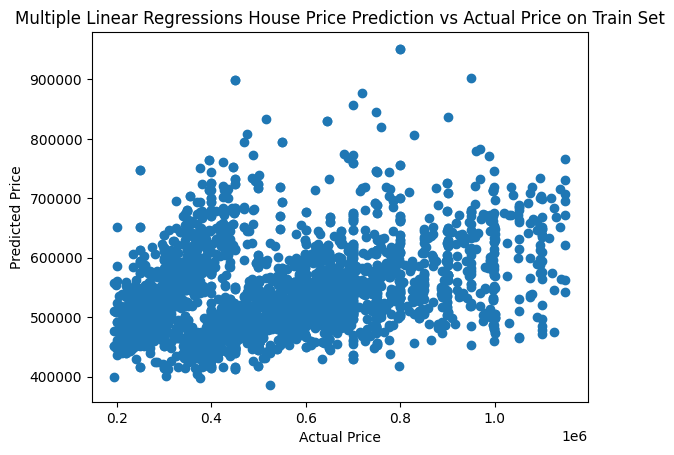

In [106]:
y_pred_test = lr.predict(testing_data)
y_pred_train = lr.predict(training_data)

import matplotlib.pyplot as plt
plt.scatter(training_labels, y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regressions House Price Prediction vs Actual Price on Train Set")
plt.show

In [107]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(training_labels, y_pred_train)

0.10746952732387494

In [108]:
mean_squared_error(training_labels, y_pred_train, squared = False)

208242.86869196204

In [123]:
error = [0]*(len(y_pred_train))

for i in range(3000):
  #print(y_pred_train[i])
  #print(training_labels[i])
  error[i] = abs(((y_pred_train[i] - training_labels[i])/training_labels[i]))*100
  #print(error[i])
  i=i+1

print(error)
print(sum(error)/len(error))

[93.82519902013239, 63.03143927458365, 56.36853188482419, 18.840512070748485, 18.840512070748485, 11.283565892147717, 136.42343388168467, 161.43104776611762, 138.90509056085935, 144.72540542122155, 123.545161541469, 127.6270390096426, 89.8297598611073, 132.3944981937273, 114.40972752349118, 134.37647471787676, 127.87080903907903, 152.01069781123735, 131.23142507030994, 155.5178188611234, 108.59929155764702, 200.5023588034036, 110.68882409519591, 136.18661259621112, 158.30211973406674, 116.7509315188547, 157.36260789567632, 146.17248223273046, 122.90193930727827, 113.3621556588575, 132.89849609071968, 123.43967634917958, 136.59555947382867, 128.56990919318244, 154.58975283353195, 102.88680095050347, 133.6218064174354, 102.87251161825056, 107.51802907261683, 107.6546657804195, 121.61563989713775, 161.90679589450372, 108.59354483691924, 136.59422199087624, 145.43516790055799, 120.80773670197532, 110.47845466756061, 128.7974410242039, 178.36893752575506, 111.14348489357259, 121.41731845845